<span style="font-family:Georgia; font-size:40px;">HDUF Source Detection & False-Color Imaging 

**Author:** Loren Alzona 
**Date:** December 9, 2025 
**Class:** ASTR 19

In [1]:
import numpy as np 
import sep 

In [2]:
from astropy.io import fits 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 

%matplotlib inline 

rcParams['figure.figsize'] = [10.,8.] 

In [3]:
from astropy.utils.data import download_file 

image_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

In [4]:
hdu_list = fits.open(image_file) 
hdu_list.info()

Filename: /Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


In [5]:
image_data = hdu_list[0].data 

print(type(image_data)) 
print(image_data.shape) 

<class 'numpy.ndarray'>
(3600, 3600)


In [6]:
image_data = hdu_list[0].data 

In [7]:
hdu_list.close()

In [8]:
print(image_data.min(), image_data.max())
print(image_data.mean(), image_data.std())

-0.9047293 74.44648
0.00079129904 0.054868467


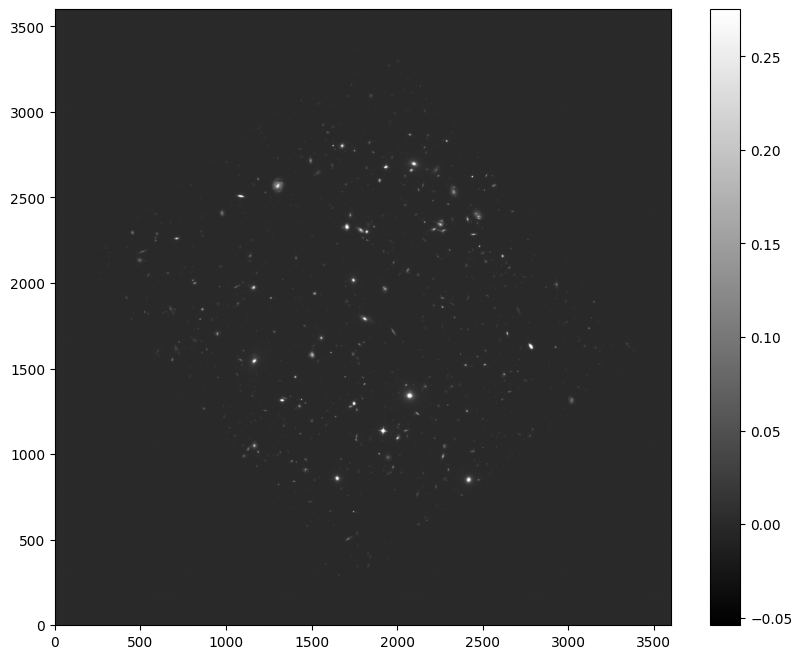

In [9]:
m, s = np.mean(image_data), np.std(image_data)

plt.figure(figsize=(10,8))
plt.imshow(image_data, cmap='gray', origin='lower',
           vmin=m-1*s, vmax=m+5*s)
plt.colorbar()
plt.show()

In [10]:
data = np.asarray(image_data,dtype=np.float64) 

In [11]:
image_data = image_data.astype(image_data.dtype.newbyteorder('='))
bkg = sep.Background(data) 

In [12]:
bkg_image = bkg.back()

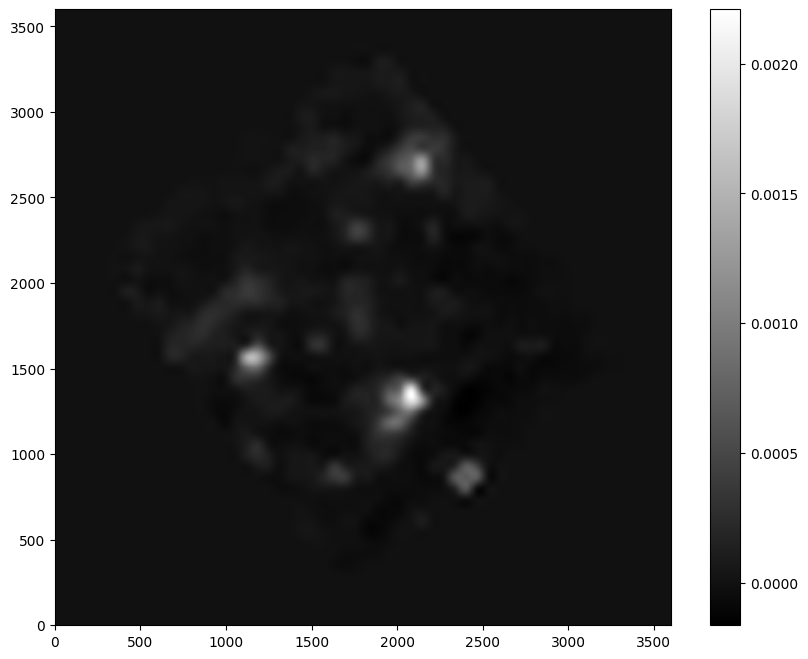

In [13]:
plt.imshow(bkg_image,interpolation='nearest',cmap='gray', origin='lower')
plt.colorbar();

In [14]:
bkg_rms = bkg.rms()

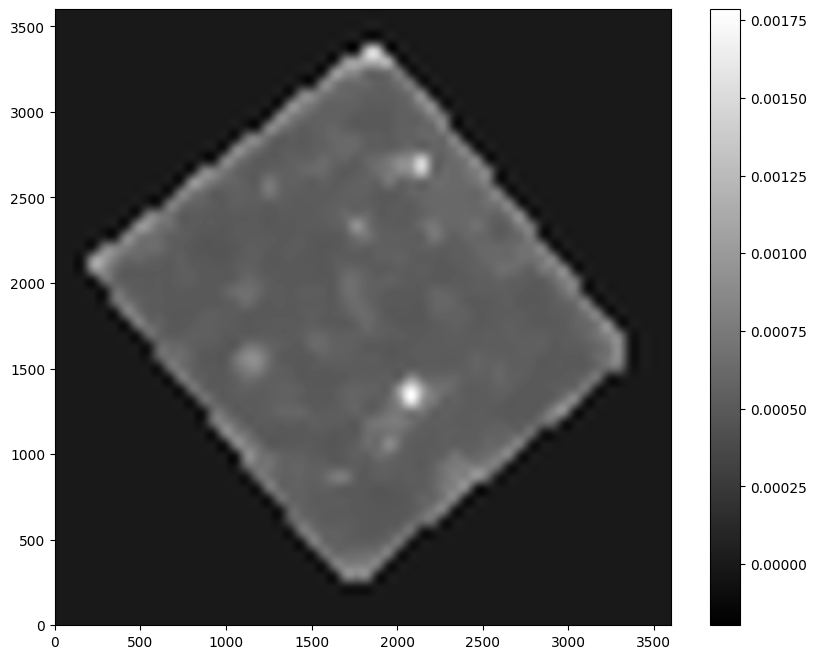

In [15]:
plt.imshow(bkg_rms,interpolation='nearest',cmap='gray',origin='lower')
plt.colorbar();

In [16]:
data = np.ascontiguousarray(data,dtype=np.float64)
mask = ~np.isfinite(data)
if mask.any():
    median_val = np.nanmedian(data)
    data[mask] = median_val 

In [17]:
data_sub = data - bkg

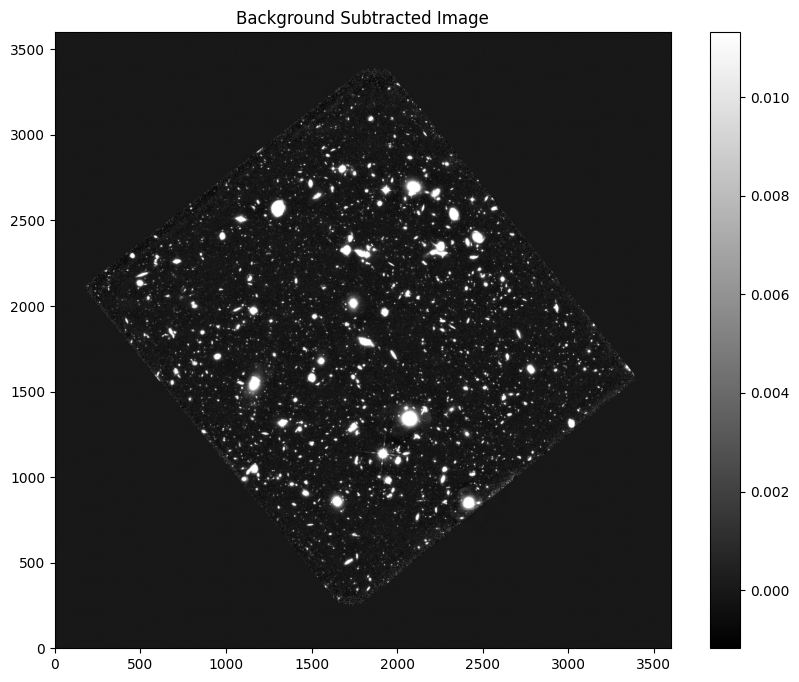

In [19]:
vmin, vmax = np.percentile(data_sub, (1, 99))
plt.imshow(data_sub, cmap='gray', origin='lower',
           vmin=vmin, vmax=vmax)
plt.title("Background Subtracted Image")
plt.colorbar()

In [22]:
data = np.ascontiguousarray(data, dtype=np.float64) 
mask = ~np.isfinite(data) 
if mask.any():
    median_val = np.nanmedian(data) 
    data[mask] = median_val 

In [23]:
objects = sep.extract(data_sub, thresh=1.5 * bkg.globalrms) 
print(len(objects))

8640


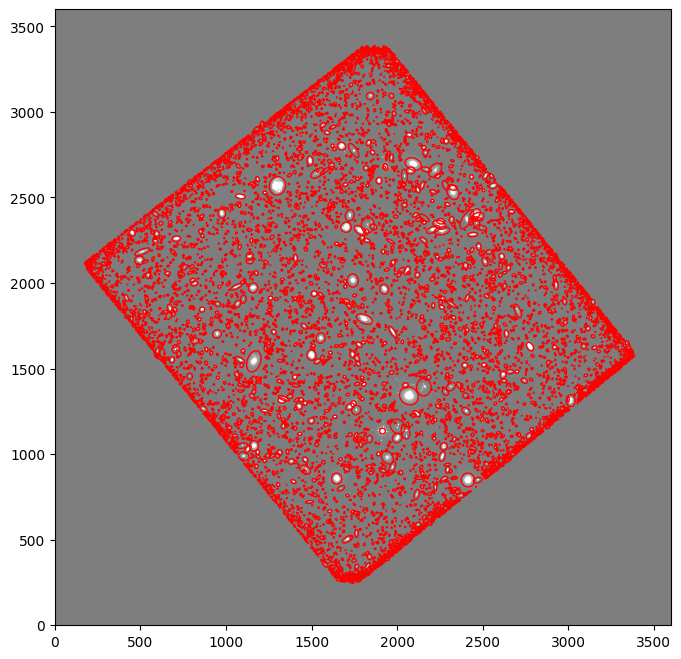

In [24]:
from matplotlib.patches import Ellipse 
fig, ax = plt.subplots() 
m, s = np.mean(data_sub), np.std(data_sub) 
im = ax.imshow(data_sub, interpolation='nearest',cmap='gray',
               vmin=m-s, vmax = m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), 
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi) 
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e) 

In [25]:
num_sources = len(objects) 
print("Number of sources detected:", num_sources)

Number of sources detected: 8640


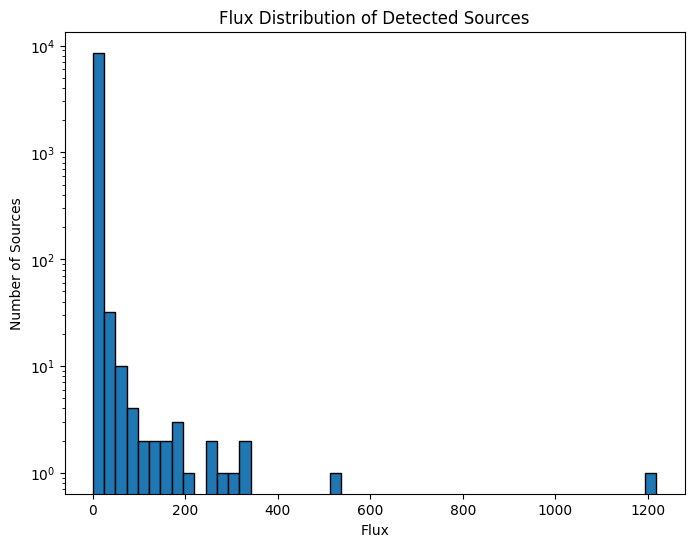

In [28]:
objects['flux']

fluxes = objects['flux']

plt.figure(figsize=(8,6))
plt.hist(fluxes,bins=50,edgecolor='black')
plt.xlabel('Flux')
plt.ylabel('Number of Sources') 
plt.title('Flux Distribution of Detected Sources') 
plt.yscale('log')
plt.show()

In [29]:
fluxes = objects["flux"] 

mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes) 
std_flux = np.std(fluxes) 

print("Mean flux:", mean_flux) 
print("Median flux:", median_flux) 
print("Standard deviation:", std_flux)

Mean flux: 1.1726778032851009
Median flux: 0.034888697788119316
Standard deviation: 17.547420912251496


In [31]:
high_outliers = objects[fluxes > mean_flux + 3*std_flux]

print("Number of bright outliers:", len(high_outliers))

Number of bright outliers: 26


In [32]:
for obj in high_outliers: 
    print("Outlier at (x,y):",obj['x'], obj['y'], "FLux:", obj['flux'])

Outlier at (x,y): 1646.3698922014678 856.6891620236033 FLux: 260.6803283691406
Outlier at (x,y): 2413.517306326506 848.5116107354661 FLux: 340.2225036621094
Outlier at (x,y): 1163.2696123052506 1047.638952407269 FLux: 70.00817108154297
Outlier at (x,y): 1999.9933773694138 1094.131548060187 FLux: 61.674652099609375
Outlier at (x,y): 1914.2549094866436 1134.3164850725645 FLux: 1218.3980712890625
Outlier at (x,y): 1744.486144499548 1293.9238614949759 FLux: 159.83328247070312
Outlier at (x,y): 1324.6626817235378 1312.8676656033613 FLux: 142.6311798095703
Outlier at (x,y): 2068.8598075601362 1340.3292486562568 FLux: 528.6531982421875
Outlier at (x,y): 1499.1766301680316 1578.3505044829287 FLux: 99.72977447509766
Outlier at (x,y): 1162.4903464065767 1542.0860533115535 FLux: 269.3052673339844
Outlier at (x,y): 2776.2298909985225 1627.7637463815327 FLux: 210.05136108398438
Outlier at (x,y): 1808.805206610683 1789.1293079303032 FLux: 152.99400329589844
Outlier at (x,y): 1923.989416282683 1963.8

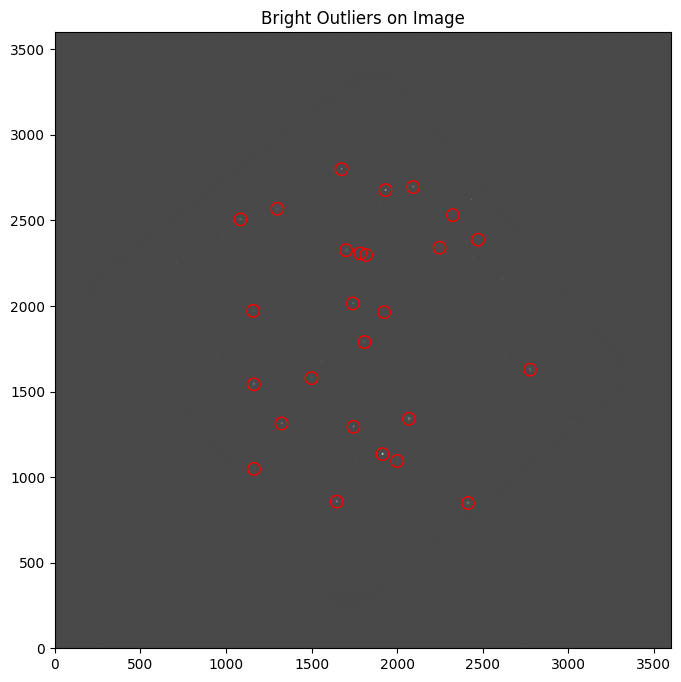

In [33]:
plt.figure(figsize=(8,8)) 
plt.imshow(data_sub, cmap='gray', origin='lower', vmin=-2, vmax=5) 
plt.scatter(high_outliers['x'], high_outliers['y'], 
            facecolors='none', edgecolors='red', s=80) 
plt.title("Bright Outliers on Image") 
plt.show()

In [34]:
z_scores = (high_outliers['flux'] - mean_flux) / std_flux

In [35]:
for obj, z in zip(high_outliers, z_scores):
    print(f"Flux {obj['flux']} is {z:.2f} ∑ above the mean")

Flux 260.6803283691406 is 14.79 ∑ above the mean
Flux 340.2225036621094 is 19.32 ∑ above the mean
Flux 70.00817108154297 is 3.92 ∑ above the mean
Flux 61.674652099609375 is 3.45 ∑ above the mean
Flux 1218.3980712890625 is 69.37 ∑ above the mean
Flux 159.83328247070312 is 9.04 ∑ above the mean
Flux 142.6311798095703 is 8.06 ∑ above the mean
Flux 528.6531982421875 is 30.06 ∑ above the mean
Flux 99.72977447509766 is 5.62 ∑ above the mean
Flux 269.3052673339844 is 15.28 ∑ above the mean
Flux 210.05136108398438 is 11.90 ∑ above the mean
Flux 152.99400329589844 is 8.65 ∑ above the mean
Flux 61.23438262939453 is 3.42 ∑ above the mean
Flux 86.82132720947266 is 4.88 ∑ above the mean
Flux 144.24844360351562 is 8.15 ∑ above the mean
Flux 91.91816711425781 is 5.17 ∑ above the mean
Flux 80.53743743896484 is 4.52 ∑ above the mean
Flux 100.5002670288086 is 5.66 ∑ above the mean
Flux 190.1242218017578 is 10.77 ∑ above the mean
Flux 58.82612991333008 is 3.29 ∑ above the mean
Flux 173.14376831054688 is 

In [50]:
f160_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"
f125_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
f105_file = "/Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

In [51]:
hdu_list = fits.open(f160_file) 
hdu_list.info()

Filename: /Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   


In [52]:
hdu_list = fits.open(f125_file) 
hdu_list.info()

Filename: /Users/lorenalzona/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   (3600, 3600)   float32   


In [53]:
def load_fits(path):
    with fits.open(path) as hdul:
        return hdul[0].data.astype(float)

In [54]:
hdu_list.close()

In [58]:
f160_img = load_fits(f160_file)
f125_img = load_fits(f125_file)
f105_img = load_fits(f105_file)

In [59]:
def normalize(img, pmin=1, pmax=99):
    vmin, vmax = np.percentile(img, (pmin, pmax))
    img = np.clip((img - vmin) / (vmax - vmin), 0, 1) 
    return img 

R = normalize(f160_img) 
G = normalize(f125_img) 
B = normalize(f105_img)

In [60]:
rgb = np.dstack([R, G, B]) 

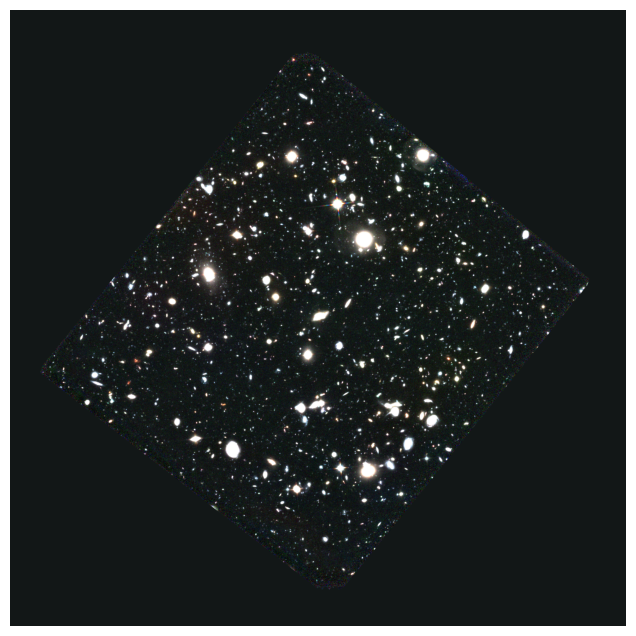

In [62]:
plt.figure(figsize=(8,8)) 
plt.imshow(rgb)
plt.axis('off')

plt.savefig("udf_color.png",dpi=200, bbox_inches='tight')